##🏡Prediction of the House Based on various Features

In this notebook, we're going to explore an machine learning project with the goal of predicting the sale price of the house

### 1. Problem Defition<br>
How can well predict the future sale price of house, given its characteristics and previous examples of how much similar houses have been sold? And from given parameter about the house, can we predict the scale of the house price accurately.

### 2. Data <br>
Data is retrived from the boston dataset of Scikit learn and it is Labeled data with rows and columns



### 3. Evaluation <br>
If we can reach 95% accuracy to predict the house price we'll pursue this project

### 4. Features<br>
These are the labeled data were we will go find insight from it
1. 'MedInc',
2. 'HouseAge',
3. 'AveRooms',
4. 'AveBedrms',
5. 'Population',
6. 'AveOccup',
7. 'Latitude',
8. 'Longitude',
9. 'MedHouseVal'


In [7]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

### Preparing the tools

In [8]:
# Regular EDA(Exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

# we want to plot our data inside the notebook
%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor



# Model Evaluations
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score



### Preparing the Dataset

In [9]:
dataset = pd.DataFrame(california_housing.frame)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Data Exploration (EDA) <br>
The goal here is to find out more about the data and become more subject export on the dataset . This is a crucial step in the data science process.

In [10]:
# Getting 5 rows of data
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Getting Info of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
# Creating the Target as Price in the dataset
dataset['Price'] = california_housing.target

In [13]:
# View the data
dataset.Price

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [14]:
# Summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


### Find the Missing Values


In [15]:
dataset.isna().sum()/len(dataset)

MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
Price          0.0
dtype: float64

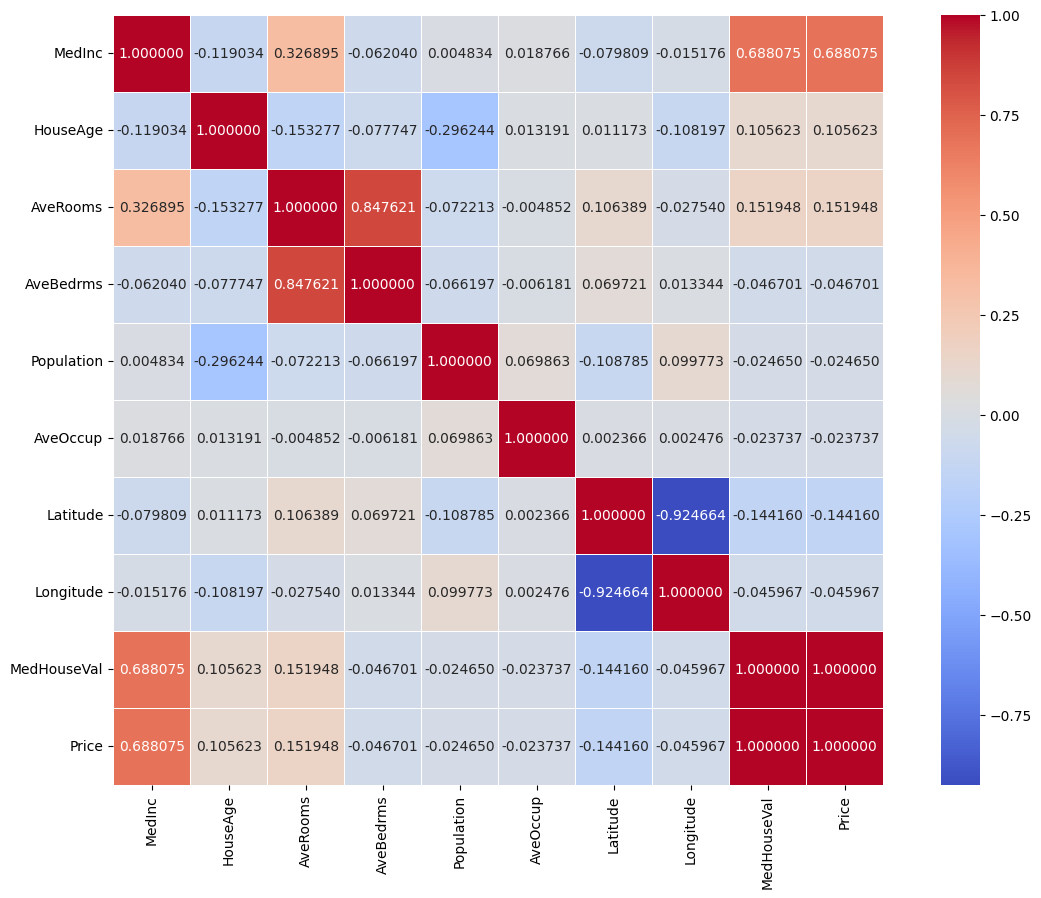

In [16]:
# Correlation
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,annot=True,
                  fmt='2f',
                  cmap='coolwarm',
                  square=True,
                  linewidths=0.5)

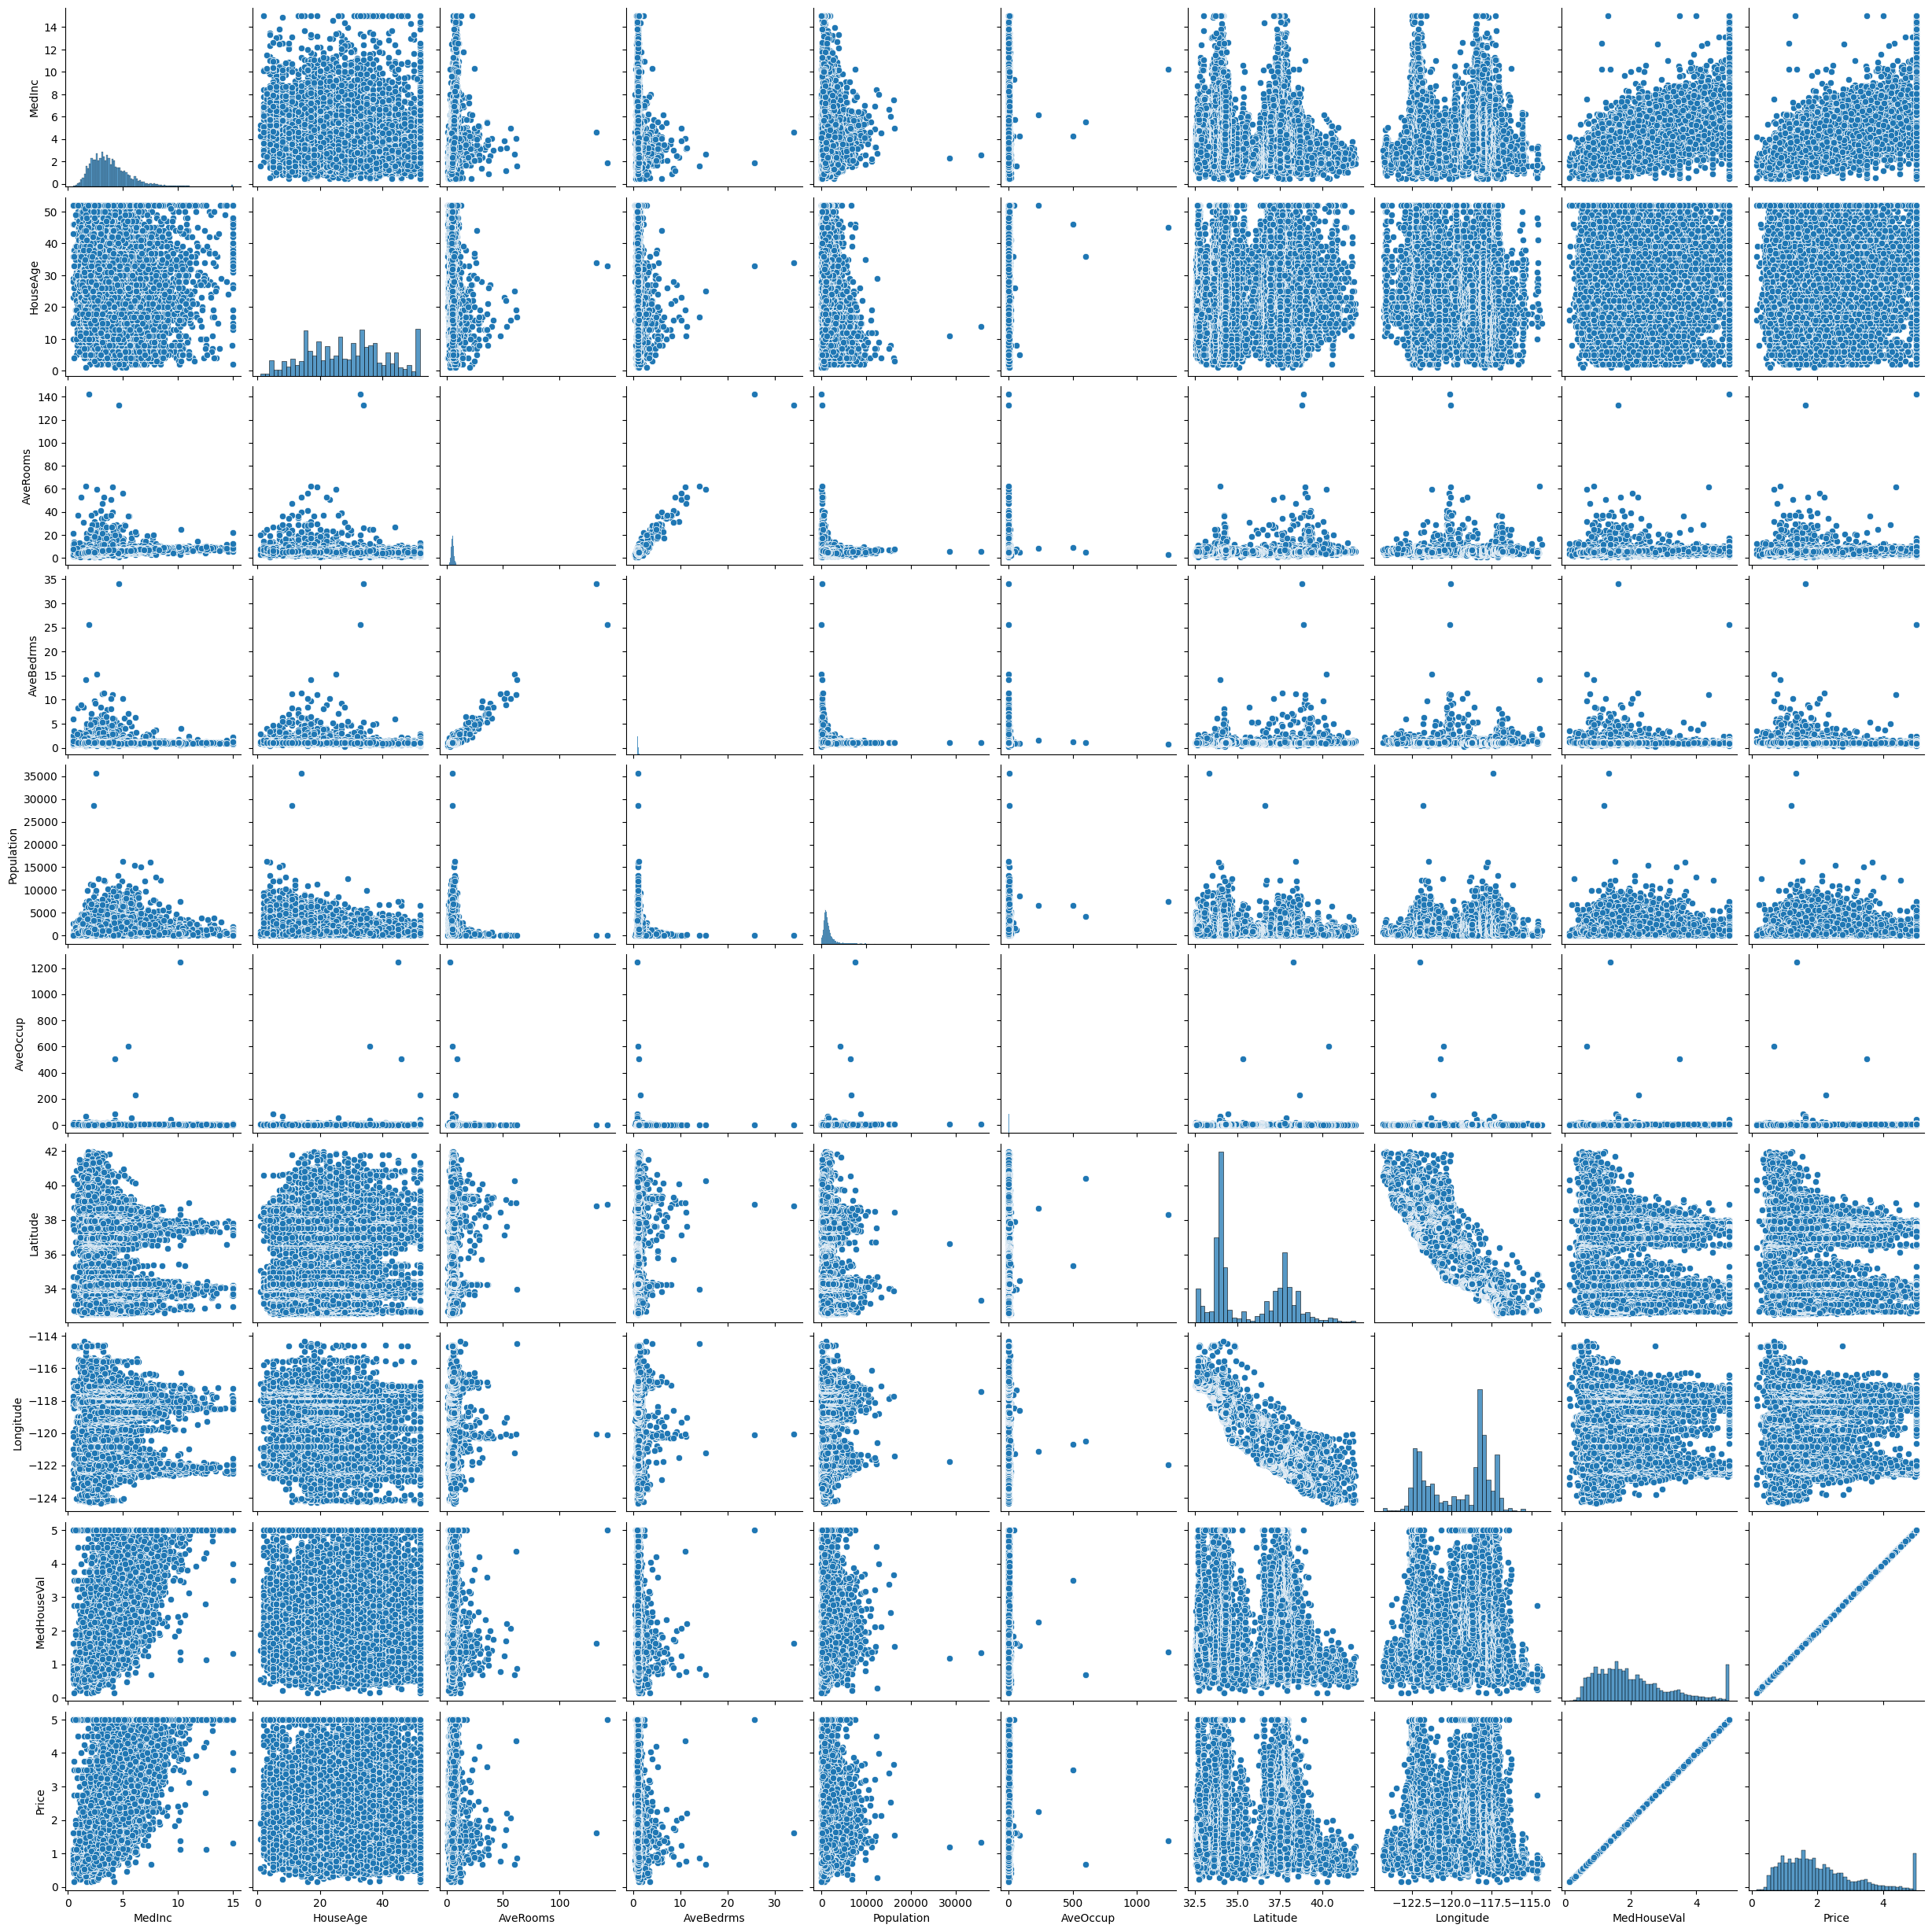

In [17]:
sns.pairplot(dataset)

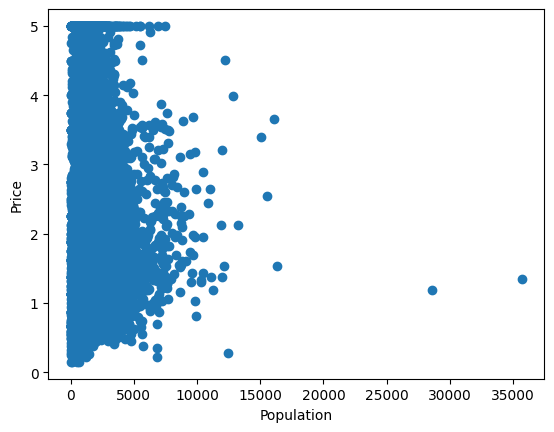

In [18]:
# Population vs Price
plt.scatter(dataset.Population, california_housing.target);
plt.xlabel("Population")
plt.ylabel("Price");

In [19]:
## Independetn and Dependent features
dataset
np.random.seed(42)
x = dataset.iloc[:,:-1]
y = dataset.iloc[ :,-1 ]

In [20]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [22]:
## Train Test Split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.size, X_test.size, y_train.size, y_test.size

(148608, 37152, 16512, 4128)

In [23]:
## Standardize the dataset
np.random.seed(42)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [24]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ..., -1.3728112 ,
         1.27258656, -0.90118909],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.87669601,
         0.70916212,  1.5127714 ],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.46014647,
        -0.44760309, -0.29921255],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ..., -0.75500738,
         0.59946887,  0.12891731],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.90651045,
        -1.18553953,  0.65997132],
       [-0.68544764,  1.85617335, -0.85144571, ...,  0.99543676,
        -1.41489815,  1.01890847]])

In [25]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ..., -1.3728112 ,
         1.27258656, -0.90118909],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.87669601,
         0.70916212,  1.5127714 ],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.46014647,
        -0.44760309, -0.29921255],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ..., -0.75500738,
         0.59946887,  0.12891731],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.90651045,
        -1.18553953,  0.65997132],
       [-0.68544764,  1.85617335, -0.85144571, ...,  0.99543676,
        -1.41489815,  1.01890847]])

In [26]:
import pickle
pickle.dump(scaler,open('sacling.pkl','wb'))

In [26]:
X_train_transformed =  pd.DataFrame(X_train, columns = x.columns)

X_test_transformed = pd.DataFrame(X_test, columns = X_test.columns)
X_test_transformed

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22,2.63300
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83,2.66800
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05,5.00001
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76,0.72300


In [27]:
# View the data
X_train_transformed.dtypes, X_test_transformed.shape
model = LinearRegression()

## Model Training

In [28]:
# Models that are used for Regression model
models = {
    "LinearRegression":LinearRegression(),
    "SGDRegressor":SGDRegressor()
}
score = {}

In [29]:
# Fit the data
# Intercept: The baseline value when all factors are zero.
np.random.seed(42)
Coefficent = 0,
intercept = 0
params_1 = []
params_2 = []
predic_values_linear = []
predic_values_SGDR = []
for name, model in models.items():
    # Ensure X_train_transformed is in the correct format
     model.fit(X_train_transformed, y_train)
     score[name] =  model.score(X_test_transformed,y_test)
     if isinstance(model,LinearRegression):
        params_1.append(model.get_params())
        y_preds = model.predict(X_test)
        predic_values_linear = y_preds
     else:
        params_2.append(model.get_params())
        y_preds = model.predict(X_test)
        predic_values_SGDR = y_preds
     Coefficent = model.coef_
     intercept = model.intercept_

In [30]:
## Print the coefficient and the intercept
print(Coefficent,
intercept)

[-0.03415591 -0.00170032  0.05105918 -0.04070311  0.00536845 -0.11269448
 -0.02742842 -0.02385892  1.16833917] [2.0713541]


In [31]:
print(params_1)

[{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}]


In [32]:
print(params_2)

[{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}]


In [33]:
predic_values_linear

array([2.62345016, 2.60148253, 7.85291476, ..., 7.85291476, 2.90787321,
       3.82357668])

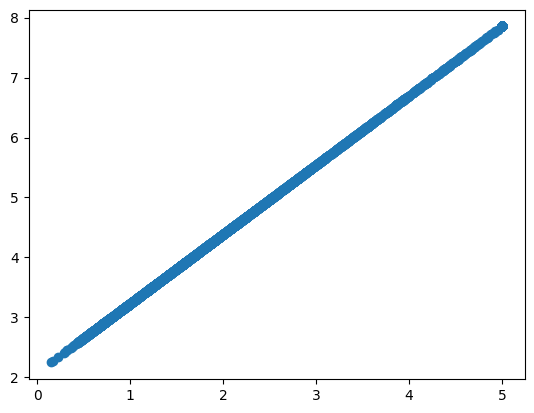

In [34]:
## Plot a scatter plot for the prediciton
plt.scatter(y_test,predic_values_linear);

In [35]:
# Errors
residuals_sgdr = y_test - predic_values_SGDR

In [36]:
# Errors
residuals_linear = y_test - predic_values_linear

In [37]:
# View the error
residuals_linear

20046   -2.146450
3024    -2.143483
15663   -2.852905
20484   -2.413381
9814    -2.506159
           ...   
15362   -2.483199
16623   -2.488665
18086   -2.852905
2144    -2.184873
3665    -2.308577
Name: Price, Length: 4128, dtype: float64

In [38]:
residuals_sgdr

20046   -11.110453
3024    -12.205684
15663   -11.624424
20484   -13.144965
9814     -9.924372
           ...    
15362   -11.441884
16623   -13.148869
18086   -12.969428
2144    -10.410927
3665    -12.773670
Name: Price, Length: 4128, dtype: float64

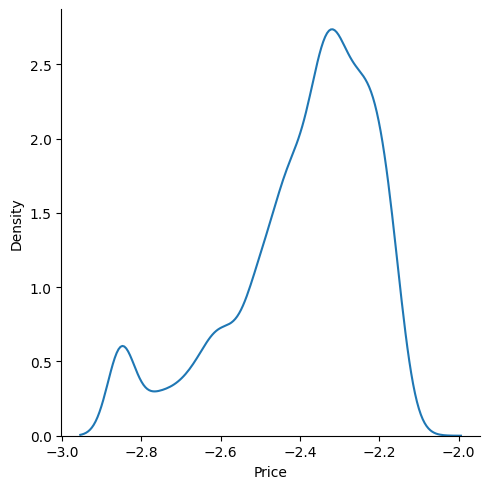

In [39]:
# Plot this residuals
sns.displot(residuals_linear, kind="kde")

In [41]:
# scatter plot with respect ot prediciotn and residuals
## uniform distribution
plt.scatter(residuals_sgdr, residuals)

NameError: name 'residuals' is not defined

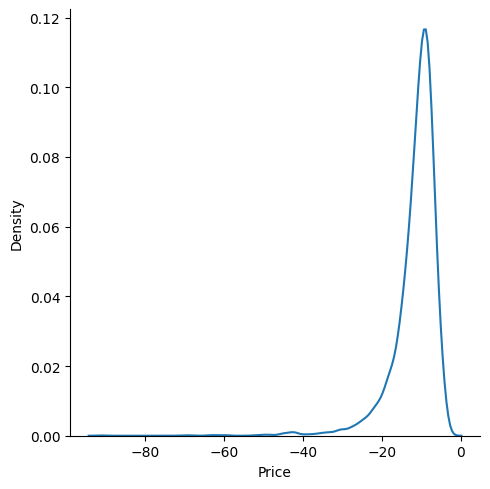

In [42]:
# Plot this residuals
sns.displot(residuals_sgdr, kind="kde")

In [43]:
mse = mean_squared_error(y_test,predic_values_linear)
mse

np.float64(5.758036606689938)

In [44]:
mse = mean_squared_error(y_test,predic_values_SGDR)
mse

np.float64(170.97460864235288)

In [45]:
mae = mean_absolute_error(y_test,predic_values_linear)
mae

np.float64(2.392920444318756)

In [46]:
mae = mean_absolute_error(y_test,predic_values_SGDR)
mae

np.float64(11.641803037527787)

In [47]:
np.sqrt(mean_squared_error(y_test,predic_values_SGDR))

np.float64(13.07572593175434)

In [48]:
np.sqrt(mean_squared_error(y_test,predic_values_linear))

np.float64(2.3995909248640563)

In [49]:
 r2_score(y_test,predic_values_SGDR)

-129.47423474759012

In [50]:
 r2_score(y_test,predic_values_linear)

-3.394075973456439

In [51]:
# Pickling the model file for Deployment
import pickle
pickle.dump(models["LinearRegression"], open('regmodel.pkl','wb'))